Profiling 

1. card_open_np 
- removed column open_dt as it is 0 
- removed duplicated records by cust_id

2. card_open 
- removed duplicated records by cust_id and kept fisrt card opening

In [1]:
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
card_open_np = pd.read_csv('data/card_openings_non_participants.csv')
card_open = pd.read_csv('data/card_openings.csv')
features = pd.read_csv('data/features.csv')
#twins = pd.read_csv('data/twins_base_202112121317.csv')
visa_com = pd.read_csv('data/visa_communications.csv')
visa_trans = pd.read_csv('data/visa_transactions.csv')
visa_trans_np = pd.read_csv('data/visa_transactions_non_particip.csv')

In [3]:
print('card_open_np shape: ', card_open_np.shape)
print('card_open shape: ', card_open.shape)
#print('features shape: ', features.shape)
#print('twins shape: ', twins.shape)
print('visa_com shape: ', visa_com.shape)
print('visa_trans shape: ', visa_trans.shape)
print('visa_trans_np shape: ', visa_trans_np.shape)

card_open_np shape:  (25589, 3)
card_open shape:  (22995, 3)
visa_com shape:  (1456826, 9)
visa_trans shape:  (396564, 4)
visa_trans_np shape:  (543494, 4)


In [4]:
card_open_np.columns

Index(['cust_id', 'open_dt', 'contact_dt'], dtype='object')

In [5]:
#features.columns

In [6]:
#twins.columns

In [7]:
visa_com.columns

Index(['channel_type', 'contact_dt', 'control_group_flg', 'sent', 'delivered',
       'opened', 'clicked', 'blocked', 'cust_id'],
      dtype='object')

In [8]:
visa_trans.columns

Index(['cust_id', 'transaction_dt', 'mcc_id', 'txn_sum'], dtype='object')

In [9]:
#features.head(10)

In [10]:
visa_trans.head(10)

,cust_id,transaction_dt,mcc_id,txn_sum
0,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-09-09,5399,2322.00
1,9fc01d326a0adcb9caaabe298064b8a26aa711878cf89f...,2021-09-07,5533,1245.00
2,7afcb430aaf9baa1786d36ffcdf3efec0f4f6fe41b32fc...,2021-08-30,5921,29.99
3,79a2d16cd93c5d15120f30f4a6a0b39060f6cdde7486c8...,2021-09-04,5211,110.00
4,0c10b18ba26cb55e4b1aed9146cf359d034fa872feeba6...,2021-08-31,5441,45.00
5,80dee4219eef1bbf3102caddc2a185bebe4e60e055a6e3...,2021-09-15,5411,263.65
6,188c790564fd3184365262fc50c114b03fb7204d95145d...,2021-09-03,5411,129.00
7,1ef28607bf5bd0ffe7a667adef4a1769ede8e93284a713...,2021-09-08,5411,1411.00
8,ec1acb6ccaaf88034067b0d58bb0b70621d8e7603a8ad9...,2021-08-22,5977,687.00
9,d33ced03426b6230fabdcbd4586146fb54319d7457ac63...,2021-08-28,4722,36360.00


In [11]:
card_open.head()

,cust_id,open_dt,contact_dt
0,2537ec14c2e5b8607ea67dfe09ec687205c59ed152407f...,2021-08-19,2021-08-12
1,b6bc9799397f07c8304673d4d51e7788a143ecb710452e...,2021-08-16,2021-08-13
2,d09ee17e668f229697a15a940915714b838826305e6973...,2021-08-21,2021-08-13
3,2323b4ae10e99e72160a74c5b42c38e47f2bc0692ef0a9...,2021-08-23,2021-08-13
4,b056b9822c2208a83eeb7150ee4be30d7088b07fed0ec5...,2021-08-23,2021-08-13


In [12]:
#card_open_np_pr = card_open_np.profile_report(minimal=True, title='card_open_np')
#card_open_np_pr.to_file("card_open_np_pr.html")

In [13]:
#card_open_pr = card_open.profile_report(minimal=True, title='card_open')
#card_open_pr.to_file("card_open_pr.html")

In [14]:
#features_pr = features.profile_report(minimal=True)
#features_pr.to_file("features_pr.html")

In [15]:
#visa_com_pr = visa_com.profile_report(minimal=True, title='visa_com')
#visa_com_pr.to_file("visa_com_pr.html")

In [16]:
#visa_trans_pr = visa_trans.profile_report(minimal=True, title='visa_trans')
#visa_trans_pr.to_file("visa_trans_pr.html")

In [17]:
#visa_trans_np_pr = visa_trans_np.profile_report(minimal=True, title="visa_trans_np")
#visa_trans_np_pr.to_file("visa_trans_np_pr.html")

In [18]:
card_open_np[card_open_np.duplicated()]

,cust_id,open_dt,contact_dt


In [19]:
card_open_np['cust_id'].value_counts()

c650975331853d5c6eecb0e587beabddf55b72f46110fe471714e4b2bdb4d1cc    20
4401403bdcff9ff580b1b3f09056cdb426f3bbefd1295be994588e67637266fb    19
5694746880d4a5a7596f3ca9563003321f850de091cb0daa6ad39e7a2defc1de    18
9039c4bf6e69bc1461033578e9a64123389f6c7c145a4532d719024680826ea2    16
6462dc729d57a81f246c5ea10cdd56ce14f625f7faffcb9913c90059e7fda121    16
                                                                    ..
5ec07838bbc85f7cef5a5ae69b87c266dc64dacd5f330cd4d179b799948dbb1a     1
5dd021cc2a4efa09654715cbf6ef47d9d97d1e3e87b2f78a47611f0aece6cf27     1
5d8698fc45d7947e0d1feed4fe8b93e942229fac8ac5a3e4c26d11367a78a195     1
5cae4af707de5a0c1d7e54222212d37a0eac1e0b24ff3bcc8be0017d6edcb65c     1
fff4369039a3427eef730c44f5c9460458339b9d010e55c991a9eb1b8f811a20     1
Name: cust_id, Length: 23943, dtype: int64

In [20]:
card_open_np[card_open_np['cust_id'] == 'c650975331853d5c6eecb0e587beabddf55b72f46110fe471714e4b2bdb4d1cc'].sort_values('open_dt')

,cust_id,open_dt,contact_dt
21200,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-02,0
23465,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-03,0
19322,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-05,0
22287,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-06,0
17863,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-08,0
17653,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-10,0
21534,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-11,0
15578,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-13,0
20096,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-16,0
19711,c650975331853d5c6eecb0e587beabddf55b72f46110fe...,2021-08-17,0


It looks that customer opened the card 20 times during month, which is strange

In [21]:
card_open_np[card_open_np['contact_dt'] != 0]

,cust_id,open_dt,contact_dt


Contact date is 0, because this people were not contacted by our marketing compaing 

In [22]:
#let's remove 0 column and remove duplicated 
card_open_np = card_open_np[['cust_id', 'open_dt']].drop_duplicates('cust_id')

In [23]:
card_open_np.shape

(23943, 2)

In [24]:
card_open.head()

,cust_id,open_dt,contact_dt
0,2537ec14c2e5b8607ea67dfe09ec687205c59ed152407f...,2021-08-19,2021-08-12
1,b6bc9799397f07c8304673d4d51e7788a143ecb710452e...,2021-08-16,2021-08-13
2,d09ee17e668f229697a15a940915714b838826305e6973...,2021-08-21,2021-08-13
3,2323b4ae10e99e72160a74c5b42c38e47f2bc0692ef0a9...,2021-08-23,2021-08-13
4,b056b9822c2208a83eeb7150ee4be30d7088b07fed0ec5...,2021-08-23,2021-08-13


In [25]:
card_open['cust_id'].value_counts()

fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018ca2353151d53f78ade    12
79a9899f62af1d1f5068defe1e72bce115daec35cc66bd50abad235fd7862d24    11
54e8145c0dd74d55d1a73270675d1ce279a7840bbbedb44c0c9929cb83978ed5     9
11af55afd2e18c1eddfc06840276cbddae409245cc44633c30784ea3921b3e2f     8
cdffcb92257172f1da471edcb7c485256a979e41b708d31c6aac2dd110039d43     8
                                                                    ..
820deda4c26b09bfe11ff877dd849e54579e02be4f0c3ee3d4fc0f4d9508a145     1
a619ff1d5b7b29751c0c217c1993a54b70621652fd3eeba278093bbb8be9e024     1
ac9b88aad47cddbe60d02ad87bb281a570f27b4c9187596ebf023ecd711141a2     1
dc82cc791ce8f60d1d79598624fb85da5a3ed2624958a103695a093df6d8280a     1
7d48d9923ca9780e9f4eabbc437f275452434c9187ddfed19debe6890422f8c7     1
Name: cust_id, Length: 21424, dtype: int64

In [26]:
card_open[card_open['cust_id'] == 'fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018ca2353151d53f78ade'].sort_values('open_dt')

,cust_id,open_dt,contact_dt
20217,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-12,2021-08-12
4843,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-13,2021-08-12
11070,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-14,2021-08-12
6212,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-15,2021-08-12
20241,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-17,2021-08-12
6601,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-19,2021-08-12
4365,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-20,2021-08-12
7229,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-22,2021-08-12
16178,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-23,2021-08-12
36,fa4aeb57cc6f9cf63661203bfa17635e247cbca3d2c018...,2021-08-24,2021-08-12


In [27]:
#drop duplicated customers and keep their first open card
card_open = card_open.sort_values('open_dt').drop_duplicates('cust_id', keep='first')

In [28]:
card_open.shape

(21424, 3)

In [29]:
card_open['open_dt'] = pd.to_datetime(card_open['open_dt'])
card_open['contact_dt'] = pd.to_datetime(card_open['contact_dt'])

In [30]:
card_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21424 entries, 1899 to 18380
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cust_id     21424 non-null  object        
 1   open_dt     21424 non-null  datetime64[ns]
 2   contact_dt  21424 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 669.5+ KB


In [31]:
#when the communication started 
print('communication started: ', card_open['contact_dt'].min())
print('communication ended: ', card_open['contact_dt'].max())

communication started:  2021-08-11 00:00:00
communication ended:  2021-08-25 00:00:00


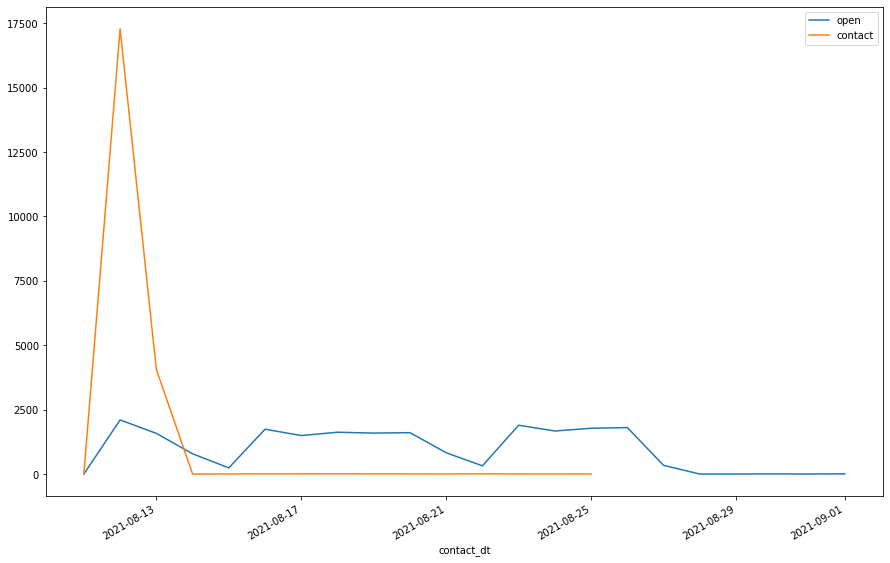

In [32]:
card_open.groupby('open_dt')['cust_id'].count().plot(figsize=(15,5), label='open')
card_open.groupby('contact_dt')['cust_id'].count().plot(figsize=(15,10), label='contact')

plt.legend()
plt.show()

In [33]:
visa_trans_np['transaction_dt'] = pd.to_datetime(visa_trans_np['transaction_dt'])
visa_trans['transaction_dt'] = pd.to_datetime(visa_trans['transaction_dt'])

In [34]:
visa_com.head()

,channel_type,contact_dt,control_group_flg,sent,delivered,opened,clicked,blocked,cust_id
0,Popup,2021-08-23,0,1,1,1,0,0,5d0a0cae173c27947838b9f3ad1282fa30771272747ede...
1,EMAIL,2021-08-12,0,1,1,0,0,0,b70d7c45f4d1724acdba89bead5941f13d93406bcbb1d7...
2,Popup,2021-08-11,0,1,1,1,0,0,1b3705d419798b8723884b643dc535ae7fc7623d6f4f7c...
3,PUSH,2021-08-12,0,0,0,0,0,0,0064bbbb2fd516698fd113adcabef8bb52824536512e8e...
4,PUSH,2021-08-12,0,0,0,0,0,0,3f0be853435987e9aff8cba237e8c19334708a996cf696...


In transactions we have some extreme maximum values. For example, we have a transaction with transaction sum = 8 490 000. Should we drop such a big values or should we analyze it as a part of compaign?

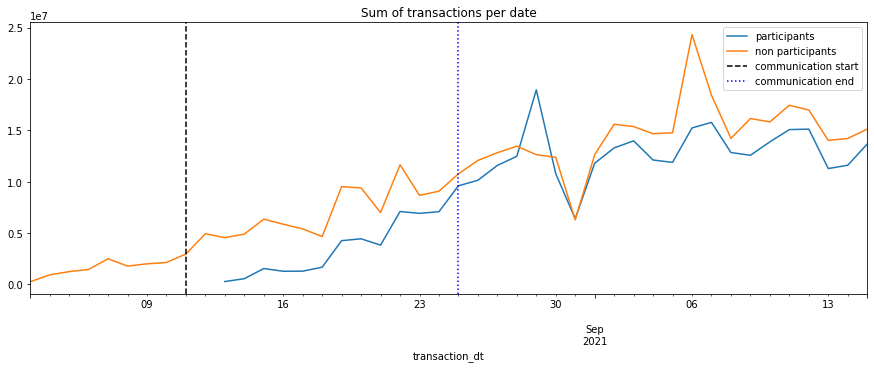

In [35]:
visa_trans.groupby('transaction_dt')['txn_sum'].sum().plot(figsize=(15,5), label='participants')
visa_trans_np.groupby('transaction_dt')['txn_sum'].sum().plot(figsize=(15,5), label='non participants')
plt.axvline('2021-08-11', color='black', ls='--', label='communication start')
plt.axvline('2021-08-25', color='blue', ls=':', label='communication end')

plt.title('Sum of transactions per date')
plt.legend()
plt.show()

In [36]:
features.head()

,cust_id,mnth_gen,turnover,involve_cd,client_segment,gender,age_gr
0,ad767176b86d500e5b8421315731388ff6c5ec93079ec9...,2021-06-01,17764.83,1,MASS,F,25-40
1,cc7c069e1866b0e14e6a733ecddaa9e503ebe5b422b796...,2021-06-01,18817.45,1,MASS,M,25-40
2,914c9e80623d8fdecb0fa39662089aa78c7c076182728f...,2021-01-01,19198.74,1,MVS LIGHT,F,25-40
3,e45e78863f239d3933462c1a06a9f23727033232851fb5...,2021-04-01,114637.54,1,MVS UPPER,F,40-60
4,2201a68b8c83f098aee50a5b787bb8344a90b2b9a64b83...,2021-07-01,112603.01,0,MVS LIGHT,F,25-40


## Communication compaign KPIs

Let's calculate some main metrics for communication compaign based on visa_communications dataset

In [37]:
visa_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456826 entries, 0 to 1456825
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   channel_type       1456826 non-null  object
 1   contact_dt         1456826 non-null  object
 2   control_group_flg  1456826 non-null  int64 
 3   sent               1456826 non-null  int64 
 4   delivered          1456826 non-null  int64 
 5   opened             1456826 non-null  int64 
 6   clicked            1456826 non-null  int64 
 7   blocked            1456826 non-null  int64 
 8   cust_id            1456826 non-null  object
dtypes: int64(6), object(3)
memory usage: 100.0+ MB


In [38]:
#divide customers from control group
comm_comp = visa_com[visa_com['control_group_flg'] == 0]
comm_comp_control_g = visa_com[visa_com['control_group_flg'] == 1]

In [39]:
comm_comp.shape

(1354146, 9)

In [40]:
comm_comp_control_g.shape

(102680, 9)

![title](open_rate.png)

![title](click_rate.png)

![title](click_to_open_rate.png)

In [41]:
open_rate =         round(len(comm_comp[comm_comp['opened'] == 1]) / 
                    len(comm_comp[comm_comp['delivered'] == 1]) * 100, 2)

click_rate =        round(len(comm_comp[comm_comp['clicked'] == 1]) / 
                    len(comm_comp[comm_comp['delivered'] == 1]) * 100, 2)

click_to_open_rate =          round(len(comm_comp[comm_comp['clicked'] == 1]) / 
                              len(comm_comp[comm_comp['opened'] == 1]) * 100, 2)

In [42]:
print('Communication Compaign KPIs for all channels for test group')
print('Open rate: ', open_rate, '%')
print('Click rate: ', click_rate, '%')
print('Click to open rate: ', click_to_open_rate, '%')

Communication Compaign KPIs for all channels
Open rate:  40.2 %
Click rate:  3.09 %
Click to open rate:  7.7 %


In [43]:
comm_comp_email = comm_comp[comm_comp['channel_type'] == 'EMAIL']
comm_comp_push = comm_comp[comm_comp['channel_type'] == 'PUSH']
comm_comp_popup = comm_comp[comm_comp['channel_type'] == 'Popup']

In [44]:
open_rate_email =   round(len(comm_comp_email[comm_comp_email['opened'] == 1]) / 
                    len(comm_comp_email[comm_comp_email['delivered'] == 1]) * 100, 2)

click_rate_email =  round(len(comm_comp_email[comm_comp_email['clicked'] == 1]) / 
                    len(comm_comp_email[comm_comp_email['delivered'] == 1]) * 100, 2)

click_to_open_rate_email =    round(len(comm_comp_email[comm_comp_email['clicked'] == 1]) / 
                              len(comm_comp_email[comm_comp_email['opened'] == 1]) * 100, 2)

In [45]:
print('Communication Compaign KPIs for email channel for test group')
print('Open rate: ', open_rate_email, '%')
print('Click rate: ', click_rate_email, '%')
print('Click to open rate: ', click_to_open_rate_email, '%')

Communication Compaign KPIs for email channel
Open rate:  10.24 %
Click rate:  0.6 %
Click to open rate:  5.9 %


In [46]:
open_rate_push =   round(len(comm_comp_push[comm_comp_push['opened'] == 1]) / 
                    len(comm_comp_push[comm_comp_push['delivered'] == 1]) * 100, 2)

click_rate_push =  round(len(comm_comp_push[comm_comp_push['clicked'] == 1]) / 
                    len(comm_comp_push[comm_comp_push['delivered'] == 1]) * 100, 2)

click_to_open_rate_push =    round(len(comm_comp_push[comm_comp_push['clicked'] == 1]) / 
                              len(comm_comp_push[comm_comp_push['opened'] == 1]) * 100, 2)

ZeroDivisionError: division by zero

In [ ]:
comm_comp_push.describe()

,control_group_flg,sent,delivered,opened,clicked,blocked
count,400048.0,400048.0,400048.0,400048.0,400048.0,400048.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


It means, that we didn't use a push during compaing

In [ ]:
comm_comp_popup.describe()

,control_group_flg,sent,delivered,opened,clicked,blocked
count,429877.0,429877.000000,429877.000000,429877.000000,429877.000000,429877.0
mean,0.0,0.690528,0.614997,0.612638,0.049391,0.0
std,0.0,0.462277,0.486597,0.487148,0.216683,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,1.000000,1.000000,1.000000,0.000000,0.0
75%,0.0,1.000000,1.000000,1.000000,0.000000,0.0
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
open_rate_popup =   round(len(comm_comp_popup[comm_comp_popup['opened'] == 1]) / 
                    len(comm_comp_popup[comm_comp_popup['delivered'] == 1]) * 100, 2)

click_rate_popup =  round(len(comm_comp_popup[comm_comp_popup['clicked'] == 1]) / 
                    len(comm_comp_popup[comm_comp_popup['delivered'] == 1]) * 100, 2)

click_to_open_rate_popup =    round(len(comm_comp_popup[comm_comp_popup['clicked'] == 1]) / 
                              len(comm_comp_popup[comm_comp_popup['opened'] == 1]) * 100, 2)

In [ ]:
print('Communication Compaign KPIs for popup channel for test group')
print('Open rate: ', open_rate_popup, '%')
print('Click rate: ', click_rate_popup, '%')
print('Click to open rate: ', click_to_open_rate_popup, '%')

Communication Compaign KPIs for popup channel
Open rate:  99.62 %
Click rate:  8.03 %
Click to open rate:  8.06 %


To calculate conversion rate we need to define who opened card 

In [ ]:
df_conv_rate = pd.merge(comm_comp, card_open, how='left', on='cust_id')

In [ ]:
df_conv_rate

,channel_type,contact_dt_x,control_group_flg,sent,delivered,opened,clicked,blocked,cust_id,open_dt,contact_dt_y
0,Popup,2021-08-23,0,1,1,1,0,0,5d0a0cae173c27947838b9f3ad1282fa30771272747ede...,NaT,NaT
1,EMAIL,2021-08-12,0,1,1,0,0,0,b70d7c45f4d1724acdba89bead5941f13d93406bcbb1d7...,NaT,NaT
2,Popup,2021-08-11,0,1,1,1,0,0,1b3705d419798b8723884b643dc535ae7fc7623d6f4f7c...,NaT,NaT
3,PUSH,2021-08-12,0,0,0,0,0,0,0064bbbb2fd516698fd113adcabef8bb52824536512e8e...,NaT,NaT
4,PUSH,2021-08-12,0,0,0,0,0,0,3f0be853435987e9aff8cba237e8c19334708a996cf696...,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
1354141,PUSH,2021-08-12,0,0,0,0,0,0,890d5f6f1d72e8d607fe8bdac1356af25456f026d9e038...,NaT,NaT
1354142,PUSH,2021-08-12,0,0,0,0,0,0,d45b5062347f295358a2cfd3d78d840913281ea241eb31...,NaT,NaT
1354143,EMAIL,2021-08-12,0,1,1,0,0,0,63ed0633bd56b27882c71796ab9a9e804a44655a6668ba...,NaT,NaT
1354144,Popup,2021-08-17,0,1,1,1,0,0,9ed87250aee6af8b4869972a7ce7a9546b3b23dea0eae9...,NaT,NaT


In [ ]:
df_conv_rate[df_conv_rate['contact_dt_x'] == df_conv_rate['contact_dt_y']]

,channel_type,contact_dt_x,control_group_flg,sent,delivered,opened,clicked,blocked,cust_id,open_dt,contact_dt_y
25,PUSH,2021-08-12,0,0,0,0,0,0,2823d67a9a2e42452650561815434999b9e059f9b8d84b...,2021-08-12,2021-08-12
74,PUSH,2021-08-12,0,0,0,0,0,0,4790e99c042e386a3fe2866df0f59f260db5e1718a8eee...,2021-08-18,2021-08-12
250,EMAIL,2021-08-12,0,1,1,1,0,0,f1b6e14260e2f73275e0a32c06233cf9cde14c662701b4...,2021-08-20,2021-08-12
277,EMAIL,2021-08-13,0,1,1,0,0,0,3bf6dc99ff2f2947a6d9a6ee384f5136802046fddad177...,2021-08-20,2021-08-13
372,EMAIL,2021-08-13,0,1,1,0,0,0,eee85b9c2bd86c1e5135a13d6da2c92c63792988019d2f...,2021-08-27,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...
1353740,EMAIL,2021-08-12,0,1,1,0,0,0,77d9e39b32c954a7c4156a067f057a94e223a33fb0506b...,2021-08-13,2021-08-12
1353802,EMAIL,2021-08-12,0,1,1,0,0,0,199b60807bae694584ae75eda5f51db554c71689f2fe0e...,2021-08-25,2021-08-12
1353816,PUSH,2021-08-12,0,0,0,0,0,0,893802f26670a8b67391a1a62973beec4521ed03644041...,2021-08-26,2021-08-12
1353917,PUSH,2021-08-12,0,0,0,0,0,0,020d85399e47037b2ff0afc16b7dd45589a4dca5d30f31...,2021-08-12,2021-08-12


In [ ]:
conv_rate =         round(len(df_conv_rate[(~df_conv_rate['open_dt'].isna()) & (df_conv_rate['delivered'] == 1)]) /
                    len(df_conv_rate[df_conv_rate['delivered'] == 1]) * 100, 2)

In [ ]:
print('Conversion rate: ', conv_rate, '%')

Conversion rate:  1.45 %


In [125]:
comm_comp_control_g.describe()

,control_group_flg,sent,delivered,opened,clicked,blocked
count,102680.0,102680.0,102680.0,102680.0,102680.0,102680.0
mean,1.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,0.0,0.0,0.0,0.0,0.0
max,1.0,0.0,0.0,0.0,0.0,0.0


## Prepare Test and Control Group Datasets

Let's enriche our data about customers and their transactions by joining tables

In [48]:
card_open.shape

(21424, 3)

In [56]:
customers_dictionary = features[['cust_id', 'client_segment', 'gender', 'age_gr']].drop_duplicates()

In [58]:
customers_dictionary.shape

(1761298, 4)

In [61]:
customers_dictionary.to_csv('data/customer_dictionary.csv', index=False)

In [63]:
visa_trans.shape

(396564, 4)

In [62]:
test_group_prp = pd.merge(visa_trans, customers_dictionary, how='left', on='cust_id')

In [64]:
test_group_prp.shape

(396564, 7)

In [65]:
test_group_prp

,cust_id,transaction_dt,mcc_id,txn_sum,client_segment,gender,age_gr
0,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-09-09,5399,2322.00,NaN,NaN,NaN
1,9fc01d326a0adcb9caaabe298064b8a26aa711878cf89f...,2021-09-07,5533,1245.00,MVS LIGHT,M,40-60
2,7afcb430aaf9baa1786d36ffcdf3efec0f4f6fe41b32fc...,2021-08-30,5921,29.99,MVS LIGHT,F,25-40
3,79a2d16cd93c5d15120f30f4a6a0b39060f6cdde7486c8...,2021-09-04,5211,110.00,MASS,F,25-40
4,0c10b18ba26cb55e4b1aed9146cf359d034fa872feeba6...,2021-08-31,5441,45.00,MASS,F,25-40
...,...,...,...,...,...,...,...
396559,7eb6a55c4ae62e156db06e84b0d245c7a815719f8a0f4d...,2021-09-11,5331,581.00,MVS LIGHT,M,25-40
396560,17a3565716c33f7ab9490a827b0c648e17242bd765605b...,2021-08-28,7994,301.13,MASS,F,<25
396561,a87ec8e7f0c822fe79f061aa9b4424286103d1340b0062...,2021-09-01,5411,149.98,MASS,M,<25
396562,5744d94764a7319bd2a8baea046cf7ba3e0dca1b0b4e52...,2021-08-26,5812,291.40,MASS,M,40-60


In [83]:
test_group = pd.merge(test_group_prp, card_open, how='inner', on='cust_id')

In [84]:
test_group.shape

(396564, 9)

In [68]:
test_group

,cust_id,transaction_dt,mcc_id,txn_sum,client_segment,gender,age_gr,open_dt,contact_dt
0,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-09-09,5399,2322.00,NaN,NaN,NaN,2021-08-13,2021-08-12
1,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-09-02,5541,1499.98,NaN,NaN,NaN,2021-08-13,2021-08-12
2,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-09-15,5399,2010.00,NaN,NaN,NaN,2021-08-13,2021-08-12
3,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-08-28,5499,476.00,NaN,NaN,NaN,2021-08-13,2021-08-12
4,db5e62076fad2729571f211d7ca4d5be1ba71e7563efbb...,2021-08-30,5399,2536.00,NaN,NaN,NaN,2021-08-13,2021-08-12
...,...,...,...,...,...,...,...,...,...
396559,bfd06350e20bf9a09d547671bae4a0245ed9cdcda09395...,2021-08-29,5541,999.89,MASS,F,25-40,2021-08-25,2021-08-12
396560,258e37b4b396d01737acb8274ebb3241a0ac20c2bb882c...,2021-08-30,7999,792.60,MASS,F,<25,2021-08-24,2021-08-12
396561,68696e369dd5a65cadd21a52d16c21b93c6289379dfd6e...,2021-08-26,5812,106.00,MVS UPPER,F,60+,2021-08-24,2021-08-12
396562,ce21285f89fb0eb3bdb414e6c2998ced052817f3e8062e...,2021-09-15,5691,3699.00,MVS UPPER,F,<25,2021-08-23,2021-08-12


In [85]:
test_group.describe(percentiles=[.8, .99])

,mcc_id,txn_sum
count,396564.000000,3.965640e+05
mean,5525.351963,8.075815e+02
std,751.054988,1.451721e+04
min,742.000000,4.000000e-02
50%,5462.000000,2.678550e+02
80%,5814.000000,7.924520e+02
99%,8211.000000,7.821000e+03
max,9998.000000,8.490000e+06


In [86]:
test_group = test_group[test_group['txn_sum'] < 7.821000e+03]

In [87]:
test_group.shape

(392597, 9)

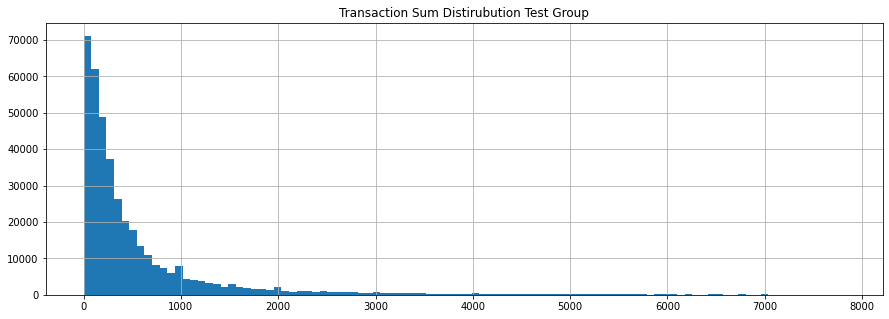

In [92]:
test_group['txn_sum'].hist(figsize=(15,5), bins=100)

plt.title('Transaction Sum Distirubution Test Group')
plt.show()

In [93]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392597 entries, 0 to 396563
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   cust_id         392597 non-null  object        
 1   transaction_dt  392597 non-null  datetime64[ns]
 2   mcc_id          392597 non-null  int64         
 3   txn_sum         392597 non-null  float64       
 4   client_segment  377067 non-null  object        
 5   gender          377067 non-null  object        
 6   age_gr          377067 non-null  object        
 7   open_dt         392597 non-null  datetime64[ns]
 8   contact_dt      392597 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 30.0+ MB


In [98]:
print('Number of customers in test group: ', len(test_group['cust_id'].unique()))

Number of customers in test group:  12954


In [113]:
test_group_aggreg = test_group.groupby('transaction_dt')[['txn_sum', 'cust_id']].agg({'txn_sum': sum, 'cust_id': 'count'})

test_group_aggreg['sum_by_cust'] = round(test_group_aggreg['txn_sum'] / test_group_aggreg['cust_id'], 2)

<AxesSubplot:ylabel='gender'>

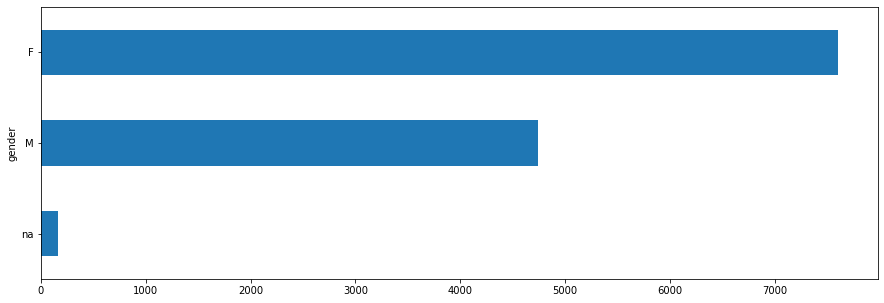

In [133]:
test_group.groupby('gender')['cust_id'].nunique().sort_values().plot(kind='barh', figsize=(15,5))

<AxesSubplot:ylabel='age_gr'>

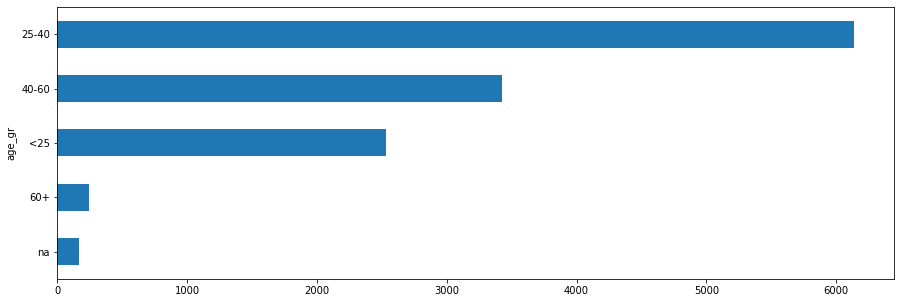

In [154]:
test_group.groupby('age_gr')['cust_id'].nunique().sort_values().plot(kind='barh', figsize=(15,5))

In [134]:
test_group.groupby('gender')['cust_id'].nunique().sort_values()

gender
na     168
M     4740
F     7599
Name: cust_id, dtype: int64

Preparing control group

In [136]:
control_group_prp = pd.merge(visa_trans_np, customers_dictionary, how='left', on='cust_id')

In [140]:
control_group = pd.merge(control_group_prp, card_open_np, how='inner', on='cust_id')

In [143]:
control_group.describe(percentiles=[.8, .99])

,mcc_id,txn_sum
count,543494.000000,5.434940e+05
mean,5554.215528,7.863055e+02
std,764.070955,6.723936e+03
min,742.000000,1.000000e-02
50%,5499.000000,2.743250e+02
80%,5912.000000,7.960000e+02
99%,8299.000000,7.598000e+03
max,9998.000000,2.630000e+06


In [144]:
control_group = control_group[control_group['txn_sum'] < 7.598000e+03]

In [145]:
control_group.shape

(538058, 8)

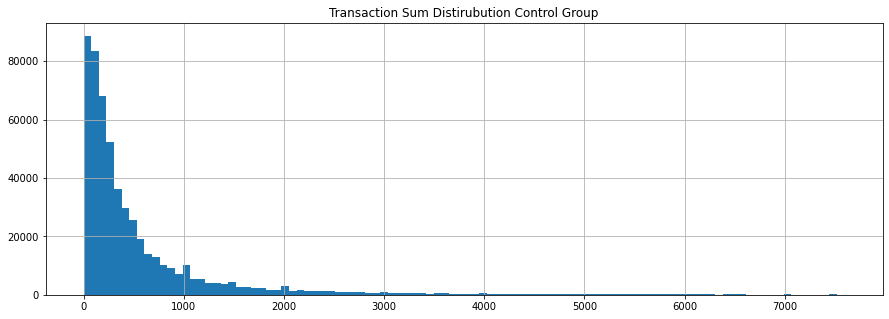

In [147]:
control_group['txn_sum'].hist(figsize=(15,5), bins=100)

plt.title('Transaction Sum Distirubution Control Group')
plt.show()

<AxesSubplot:ylabel='gender'>

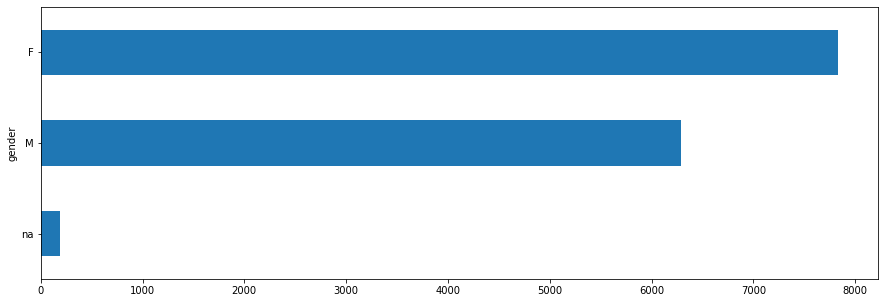

In [155]:
control_group.groupby('gender')['cust_id'].nunique().sort_values().plot(kind='barh', figsize=(15,5))

<AxesSubplot:ylabel='age_gr'>

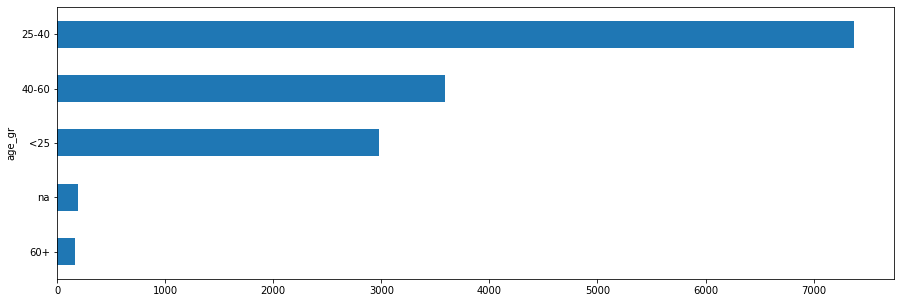

In [156]:
control_group.groupby('age_gr')['cust_id'].nunique().sort_values().plot(kind='barh', figsize=(15,5))

In [148]:
control_group_aggreg = control_group.groupby('transaction_dt')[['txn_sum', 'cust_id']].agg({'txn_sum': sum, 'cust_id': 'count'})

control_group_aggreg['sum_by_cust'] = round(control_group_aggreg['txn_sum'] / control_group_aggreg['cust_id'], 2)

In [150]:
control_group.to_csv('data/control_group.csv')
control_group_aggreg.to_csv('data/control_group_aggreg.csv')
test_group_aggreg.to_csv('data/test_group_aggreg.csv')

In [153]:
print('Number of customers in control group: ', len(control_group['cust_id'].unique()))

Number of customers in control group:  14309


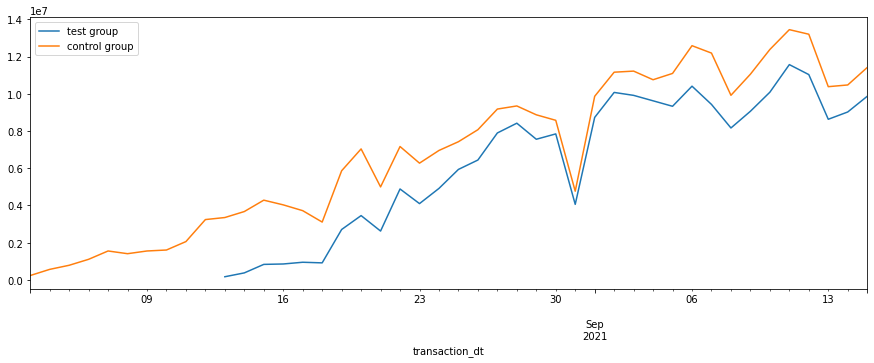

In [152]:
test_group_aggreg['txn_sum'].plot(figsize=(15,5), label='test group')
control_group_aggreg['txn_sum'].plot(figsize=(15,5), label='control group')

plt.legend()
plt.show()

## Financial Results analysis

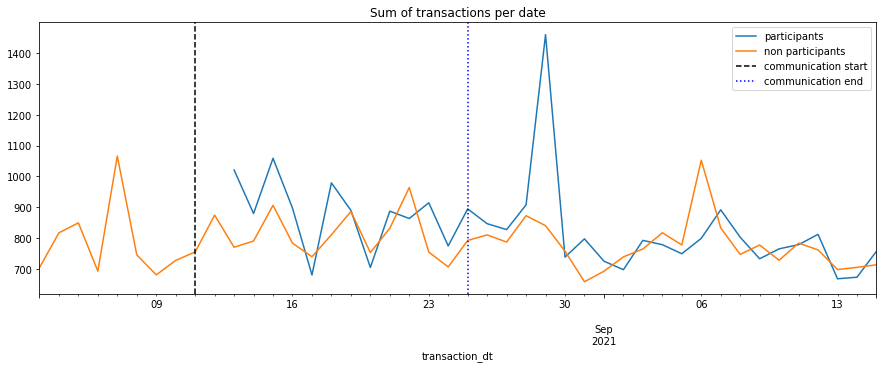

In [47]:
visa_trans.groupby('transaction_dt')['txn_sum'].sum().plot(figsize=(15,5), label='participants')
visa_trans_np.groupby('transaction_dt')['txn_sum'].sum().plot(figsize=(15,5), label='non participants')
plt.axvline('2021-08-11', color='black', ls='--', label='communication start')
plt.axvline('2021-08-25', color='blue', ls=':', label='communication end')

plt.title('Sum of transactions per date')
plt.legend()
plt.show()